In [1]:
import torch
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import cv2
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import random
import shutil
import yaml
import ultralytics
from ultralytics import YOLO

In [3]:
def get_files(directory, extension):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

In [5]:
image_files = sorted(get_files("tomato_dataset/Images", "jpeg"))
label_files = sorted(get_files("tomato_dataset/labels", "txt"))

In [6]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
indices = list(range(len(label_files)))
random.shuffle(indices) # using random shuffle as there is not a class imbalance

In [7]:
# Calculate split indices
num_samples = len(indices)
num_train = int(num_samples * train_ratio)
num_val = int(num_samples * val_ratio)

In [8]:
train_indices = indices[:num_train]
val_indices = indices[num_train:num_train + num_val]
test_indices = indices[num_train + num_val:]

In [9]:
def move_files(indices, dest_dir, label_files, image_files):
    for i in indices:
        # Move the text file
        txt_file = label_files[i]
        if os.path.exists(txt_file):
            dest_txt_file = os.path.join(dest_dir, os.path.basename(txt_file))
            shutil.move(txt_file, dest_txt_file)
        else:
            print(f"Warning: Text file {txt_file} does not exist.")

        # Move the corresponding image file
        img_file = image_files[i]
        if os.path.exists(img_file):
            dest_img_file = os.path.join(dest_dir, os.path.basename(img_file))
            shutil.move(img_file, dest_img_file)
        else:
            print(f"Warning: Image file {img_file} does not exist.")

In [10]:
#move_files(train_indices, "datasets/train", label_files, image_files)
move_files(val_indices, "datasets/valid", label_files, image_files)
move_files(test_indices, "datasets/test", label_files, image_files)

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.145 🚀 Python-3.7.10 torch-1.13.1+cu117 CPU (Intel Core(TM) i7-7600U 2.80GHz)
Setup complete ✅ (4 CPUs, 15.1 GB RAM, 61.6/86.2 GB disk)


In [12]:
face_yaml = dict(
    train ='/home/crasious/projects/fruit/datasets/train',
    val ='/home/crasious/projects/fruit/datasets/valid',
    test='/home/crasious/projects/fruit/datasets/test',
    nc = 2,
    names =['unriped','riped']
)

with open('face.yaml', 'w') as outfile:
    yaml.dump(face_yaml, outfile, default_flow_style=True)
    
%cat face.yaml

{names: [unriped, riped], nc: 2, test: /home/crasious/projects/fruit/datasets/test,
  train: /home/crasious/projects/fruit/datasets/train, val: /home/crasious/projects/fruit/datasets/valid}


In [15]:
model = YOLO("yolov8n.pt") 

In [16]:
!yolo task=detect mode=train model=yolov8n.pt data=face.yaml epochs=10 imgsz=640

New https://pypi.org/project/ultralytics/8.2.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.10 torch-1.13.1+cu117 CPU (Intel Core(TM) i7-7600U 2.80GHz)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=face.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=Fal

<Figure size 1440x720 with 0 Axes>

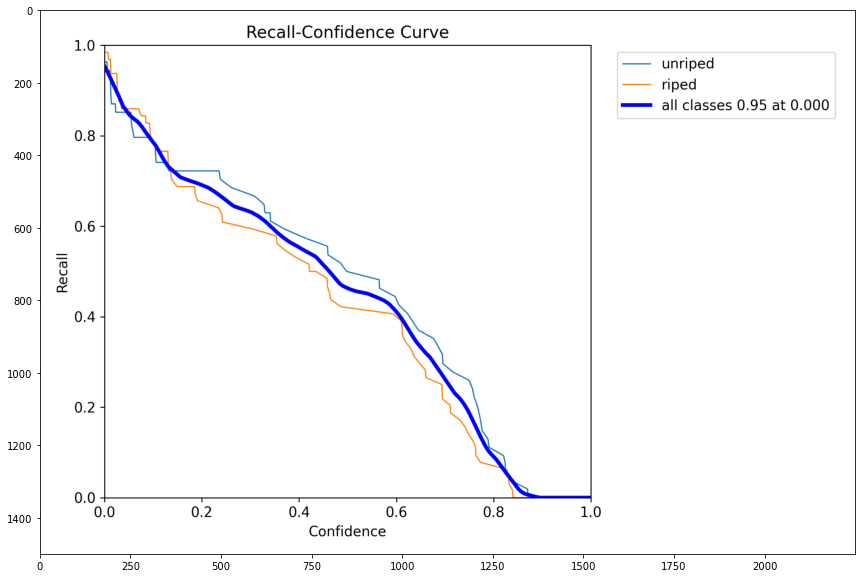

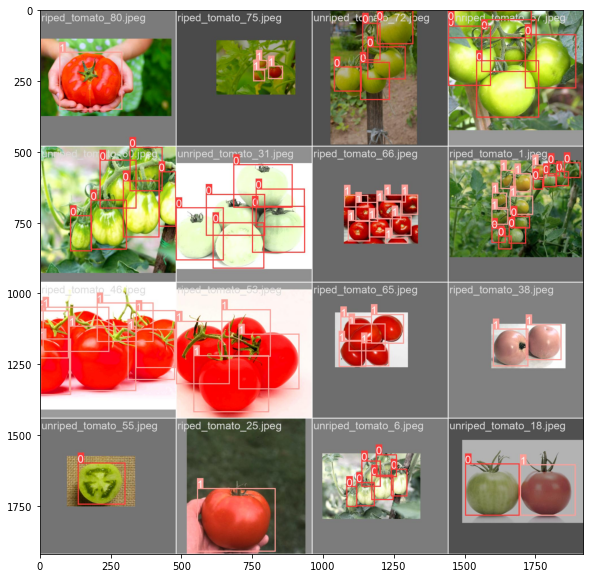

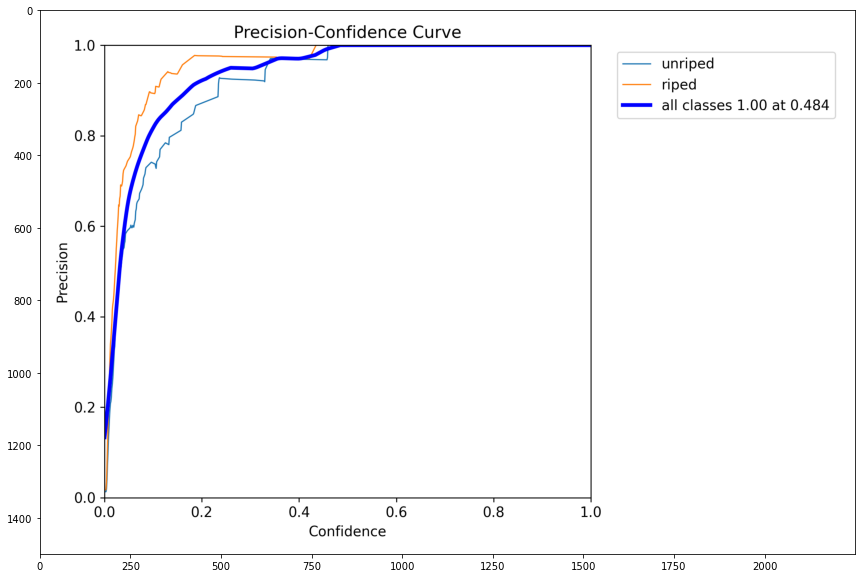

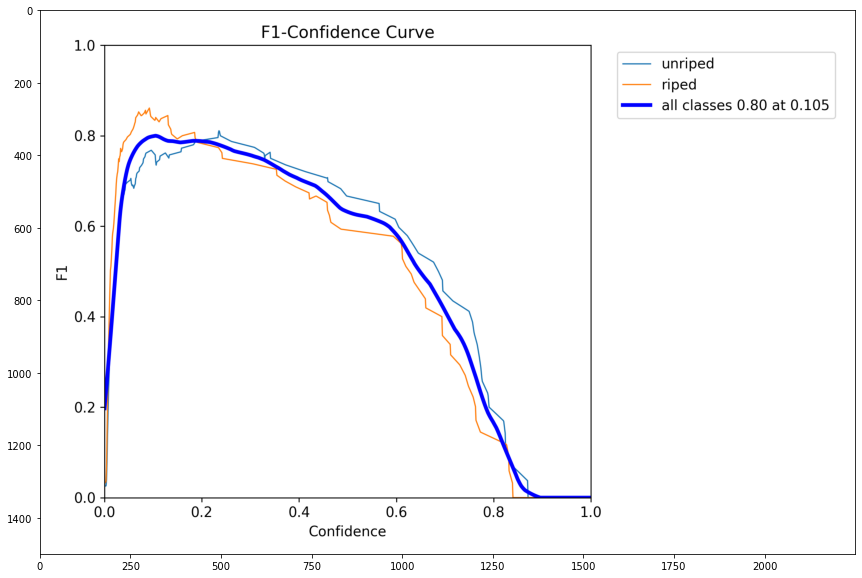

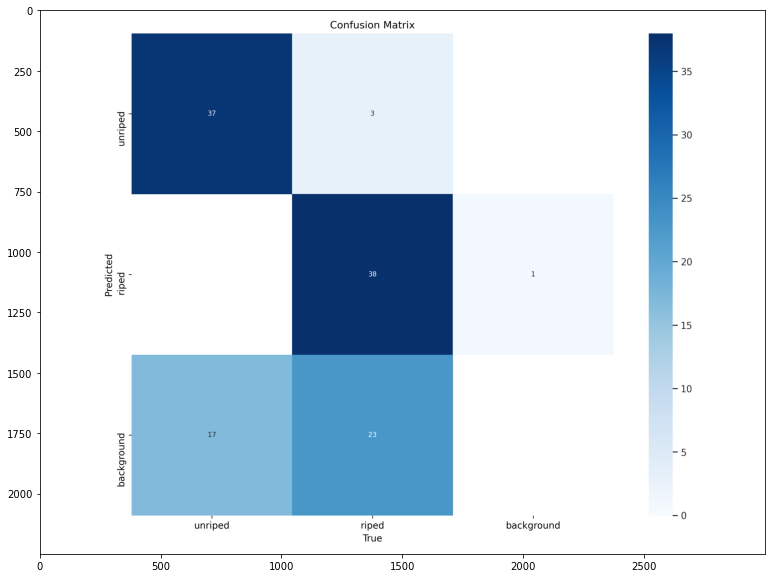

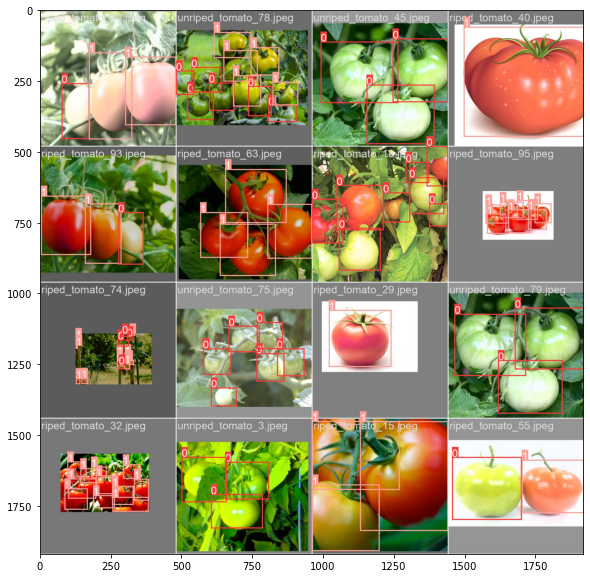

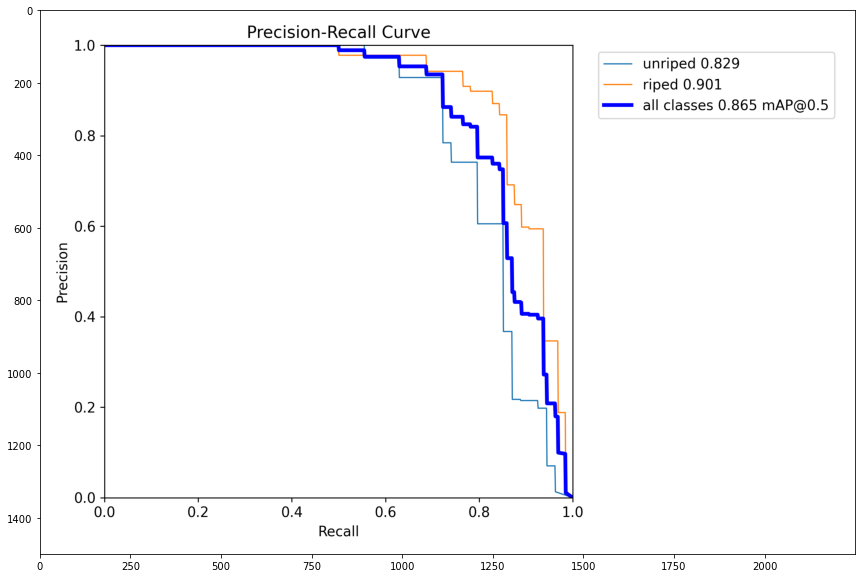

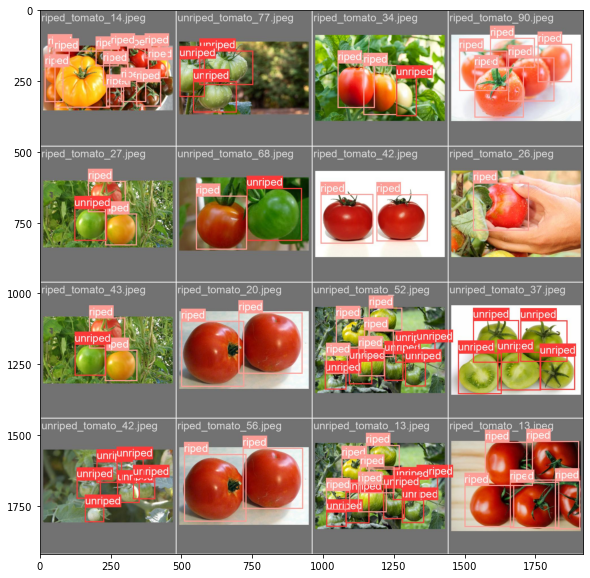

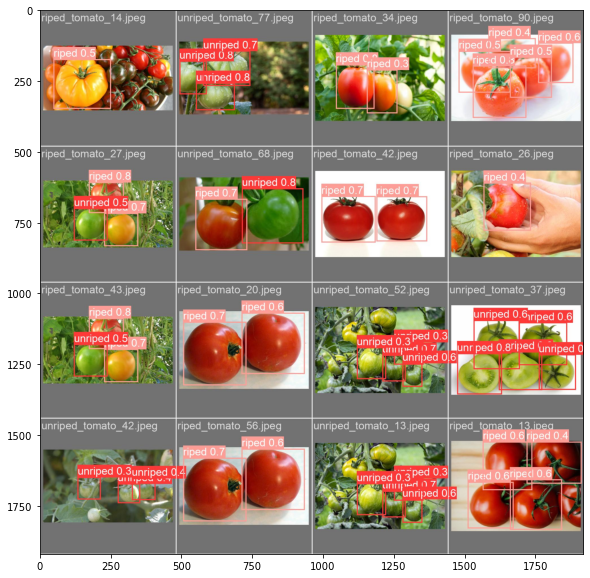

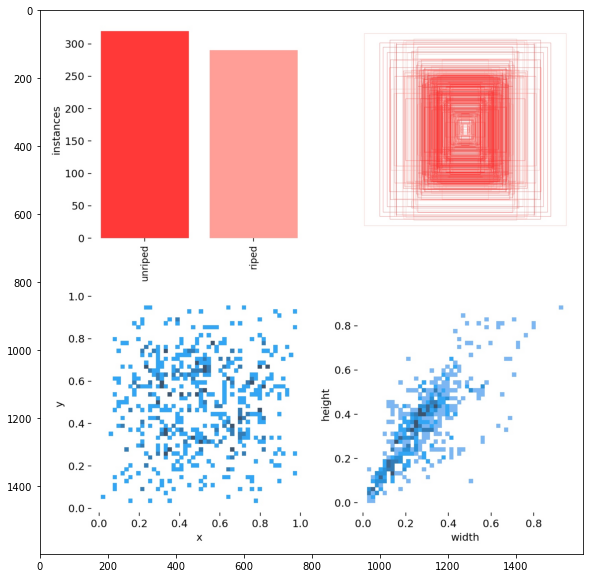

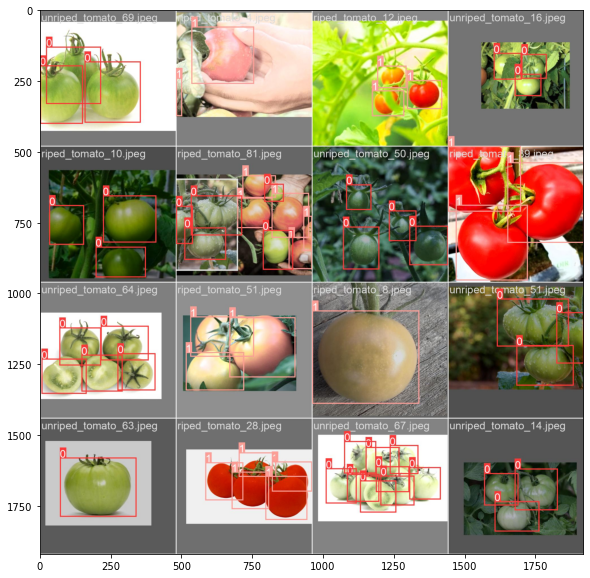

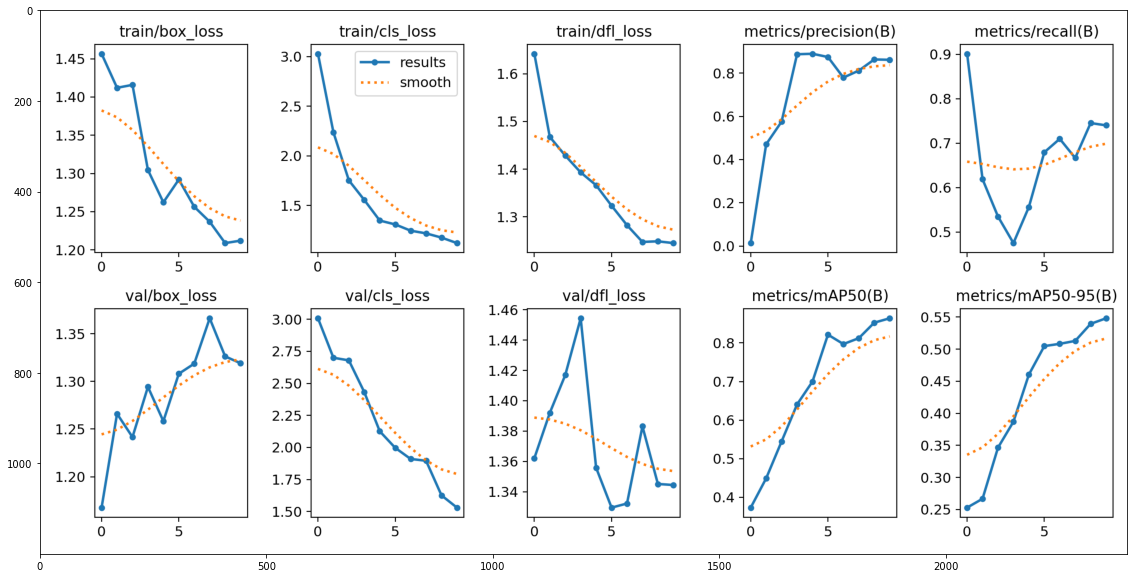

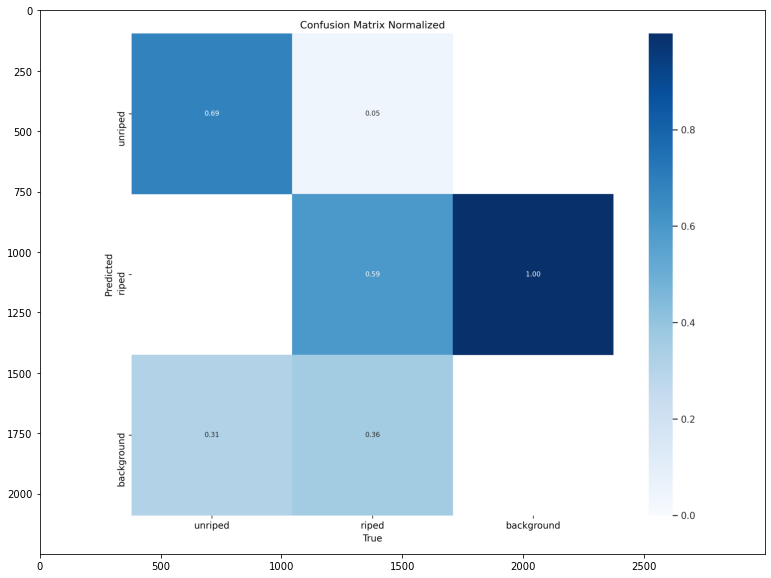

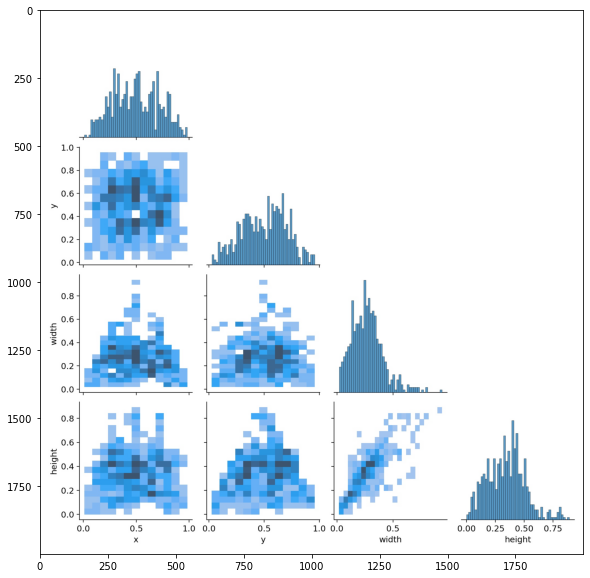

In [23]:
image_dir = 'runs/detect/train'
from PIL import Image
# List all files in the directory
files = os.listdir(image_dir)

# Filter out image files (assuming they are jpg or png)
image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Create a figure to display images
plt.figure(figsize=(20, 10))

# Loop through all image files and display them
for i, image_file in enumerate(image_files):
    # Open image
    img_path = os.path.join(image_dir, image_file)
    img = Image.open(img_path)
    
    image=np.array(img)
    plt.figure(figsize=(20,10))
    plt.imshow(image)
    plt.show()

# Adjust layout to fit all images
